In [81]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

Create a DataFrame with the Top 100 most streamed songs in Spotify

In [82]:
# Load the CSV file into a Pandas DataFrame
dataset_df = pd.read_csv("spotify-2023.csv",encoding='latin-1')
#Remove row 574 because data is not representative
dataset_df = dataset_df.drop(574,axis=0)
#Modify column streams to type int64
dataset_df['streams'] = dataset_df['streams'].astype('int64')
#Modify column 'in deezer playlists' to float64
dataset_df['in_deezer_playlists'] = dataset_df['in_deezer_playlists'].replace(to_replace=',',value='',regex=True)
dataset_df['in_deezer_playlists'] = dataset_df['in_deezer_playlists'].astype('float64')
# Devide the stream values by 1,000,000 to express it in million
streams_mil=(dataset_df[['streams']]/1000000).round(2)
dataset_df['streams mil'] = streams_mil
# Sort the DataFrame in descending order by number of streams
streams_df=dataset_df.sort_values('streams',ascending=False)
# Create a new dataframe with the sample of the 100 most streamed songs in Spotify
top100_streams_df = streams_df.iloc[:100]
#Display dataframe
top100_streams_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams mil
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,3703.90
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,3562.54
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,C#,Major,50,45,41,75,0,11,3,2887.24
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,F#,Minor,82,54,59,69,0,18,10,2864.79
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2808.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Shivers,Ed Sheeran,1,2021,9,9,10147,30,1302184087,234,...,D,Major,79,82,86,28,0,4,9,1302.18
401,Heather,Conan Gray,1,2020,3,20,6170,7,1301799902,82,...,F,Major,47,25,43,62,0,32,3,1301.80
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,NaN,Minor,48,44,42,12,2,11,3,1297.03
820,Iris,The Goo Goo Dolls,1,1998,3,31,13101,9,1284942608,137,...,B,Minor,32,49,72,0,0,9,4,1284.94


### Analysis by Artist

In [83]:
# Distribution by artist
artist_count = len(top100_streams_df['artist(s)_name'].unique())
print(f'There are {artist_count} artists among the most streamed songs')

artists = top100_streams_df.groupby('artist(s)_name')
artists_df = pd.DataFrame(artists['artist(s)_name'].count()).rename(columns={'artist(s)_name':'No of songs'}).reset_index()
artists_df2=artists_df.sort_values('No of songs',ascending=False)
artists_df2

There are 77 artists among the most streamed songs


,artist(s)_name,No of songs
23,Ed Sheeran,6
71,The Weeknd,5
24,Eminem,3
30,Harry Styles,3
10,Bruno Mars,3
...,...,...
36,James Arthur,1
37,John Legend,1
39,Justin Bieber,1
40,"Justin Bieber, Daniel Caesar, Giveon",1


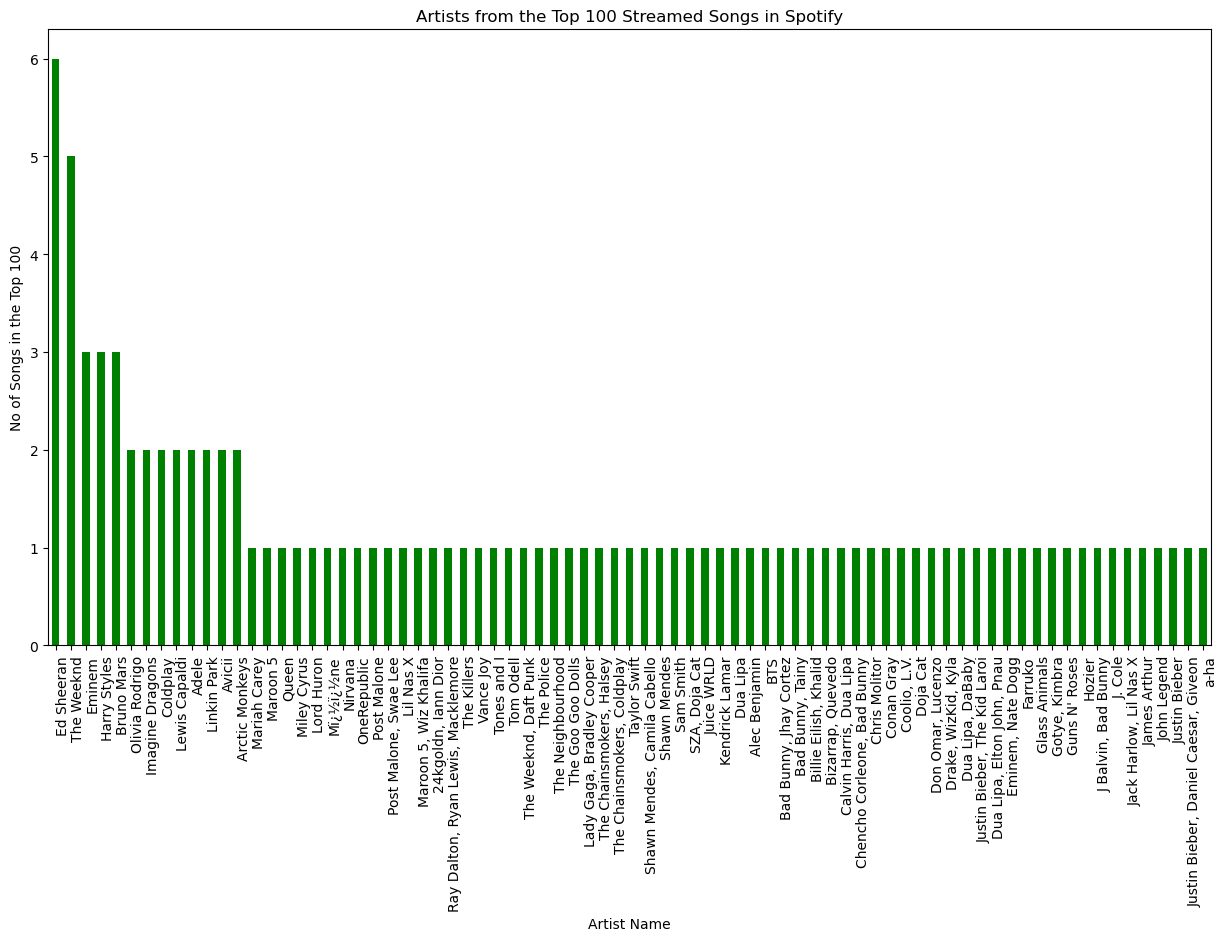

In [84]:
bar_chart=artists_df2.plot(kind='bar',facecolor='green',alpha=1,xlabel="Artist Name",ylabel="No of Songs in the Top 100",legend=False,figsize=(15,8),title='Artists from the Top 100 Streamed Songs in Spotify')
xticklabels = artists_df2["artist(s)_name"]
bar_chart.set_xticklabels(xticklabels, rotation=90, rotation_mode='anchor', ha='right',fontsize=10)
plt.show()

### Analysis of Songs Attributes

In [85]:
# Analysis of the mode
mode = top100_streams_df.groupby('mode')
mode_df = pd.DataFrame(mode['mode'].count()).rename(columns={'mode':'count'}).reset_index()
mode_df

,mode,count
0,Major,64
1,Minor,36


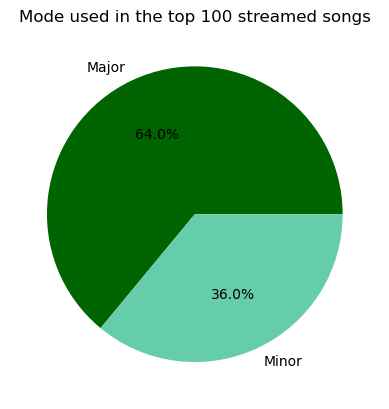

In [86]:
# Generate a pie plot with the mode information
pie_chart=mode_df['count'].plot(kind='pie',title='Mode used in the top 100 streamed songs',ylabel='',labels=mode_df['mode'],colors=['darkgreen','mediumaquamarine'],autopct="%1.1f%%")
plt.show()

In [87]:
# Analysis of the key
# Drop any rows with null values
top100_streams_df_reduced = top100_streams_df.dropna()
top100_streams_df_reduced

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams mil
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,3562.54
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2808.10
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,C#,Major,77,36,63,1,0,36,5,2713.92
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,C#,Major,59,48,76,4,0,10,5,2665.34
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,A#,Minor,77,74,78,4,0,23,11,2594.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,"Quevedo: Bzrp Music Sessions, Vol. 52","Bizarrap, Quevedo",2,2022,7,6,8506,45,1356565093,94,...,D,Major,62,55,78,1,3,23,4,1356.57
37,Blank Space,Taylor Swift,1,2014,1,1,11434,53,1355959075,154,...,F,Major,75,57,68,9,0,13,6,1355.96
790,Callaita,"Bad Bunny, Tainy",2,2019,5,31,9539,15,1304313953,162,...,D,Major,61,24,62,60,0,24,31,1304.31
401,Heather,Conan Gray,1,2020,3,20,6170,7,1301799902,82,...,F,Major,47,25,43,62,0,32,3,1301.80


In [88]:
# Create a dataframe 
key = top100_streams_df_reduced.groupby('key')
key_df = pd.DataFrame(key['key'].count()).rename(columns={'key':'count'}).reset_index().sort_values('count',ascending=False)
key_df

,key,count
3,C#,15
7,F,10
4,D,9
2,B,7
10,G#,6
6,E,5
8,F#,4
9,G,4
1,A#,3
5,D#,3


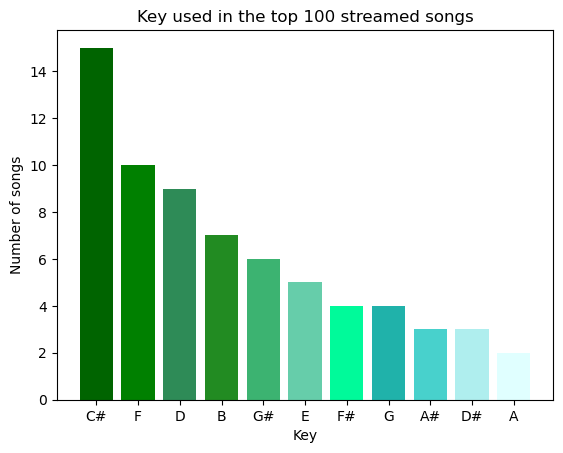

In [89]:
# Chart summarizing the key analysis
colors = ['darkgreen','green','seagreen','forestgreen','mediumseagreen','mediumaquamarine','mediumspringgreen','lightseagreen','mediumturquoise','paleturquoise','lightcyan']
plt.bar(key_df['key'],key_df['count'],color=colors)
plt.title('Key used in the top 100 streamed songs')
plt.xlabel('Key')
plt.ylabel('Number of songs')
plt.show()

In [90]:
# Analysis of number of artists in a song
artistcount = top100_streams_df.groupby('artist_count')
artistcount_df = pd.DataFrame(artistcount['artist_count'].count()).rename(columns={'artist_count':'count'}).reset_index().sort_values('count',ascending=False)
artistcount_df

,artist_count,count
0,1,73
1,2,23
2,3,4


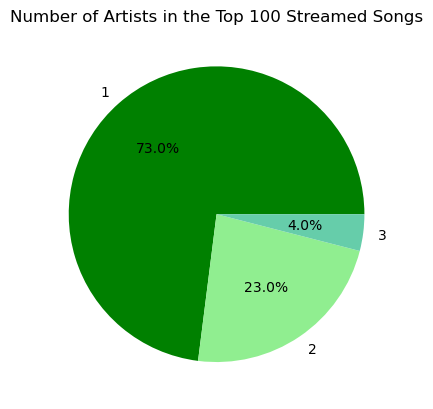

In [91]:
# Generate a pie plot with the information about the number of artists in a song
pie_chart=artistcount_df['count'].plot(kind='pie',ylabel='',labels=artistcount_df['artist_count'],colors=['green','lightgreen','mediumaquamarine'],autopct="%1.1f%%",title='Number of Artists in the Top 100 Streamed Songs')
plt.show()

### Number of Streams in Spotify vs. Presence in Playlists (from different platforms)

PearsonRResult(statistic=0.34807793815879573, pvalue=0.000387188441475055)


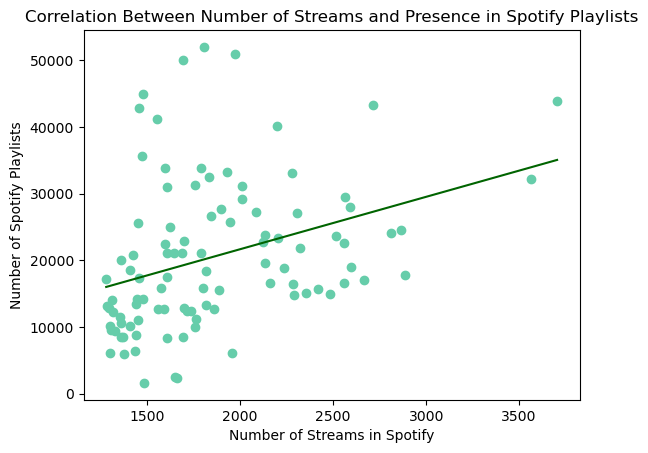

In [92]:
# Correlation between presence in spotify playlists and in apple playlists
streams = top100_streams_df['streams mil']

spotify = top100_streams_df['in_spotify_playlists']

correlation = st.pearsonr(streams,spotify)
print(correlation)

plt.scatter(streams,spotify,marker="o", facecolors="mediumaquamarine", edgecolors="mediumaquamarine")
plt.xlabel("Number of Streams in Spotify")
plt.ylabel("Number of Spotify Playlists")
plt.title("Correlation Between Number of Streams and Presence in Spotify Playlists")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,spotify)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='darkgreen')

plt.show()

PearsonRResult(statistic=0.5425091302221758, pvalue=5.531555838348921e-09)


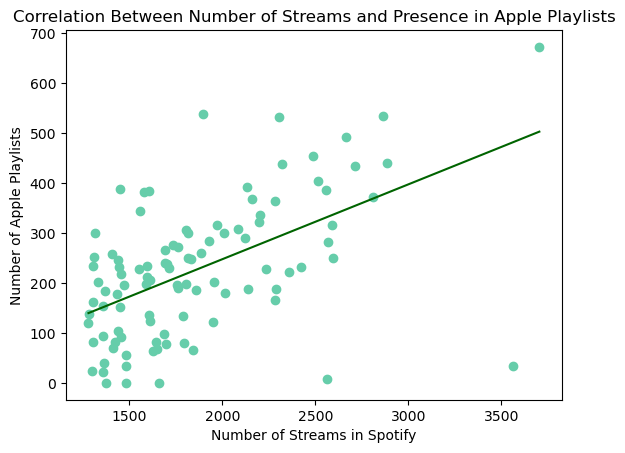

In [93]:
# Correlation between presence in spotify playlists and in apple playlists


apple = top100_streams_df['in_apple_playlists']

correlation = st.pearsonr(streams,apple)
print(correlation)

plt.scatter(streams,apple,marker="o", facecolors="mediumaquamarine", edgecolors="mediumaquamarine")
plt.xlabel("Number of Streams in Spotify")
plt.ylabel("Number of Apple Playlists")
plt.title("Correlation Between Number of Streams and Presence in Apple Playlists")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,apple)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='darkgreen')

plt.show()

PearsonRResult(statistic=0.16048243945592952, pvalue=0.11071127912564763)


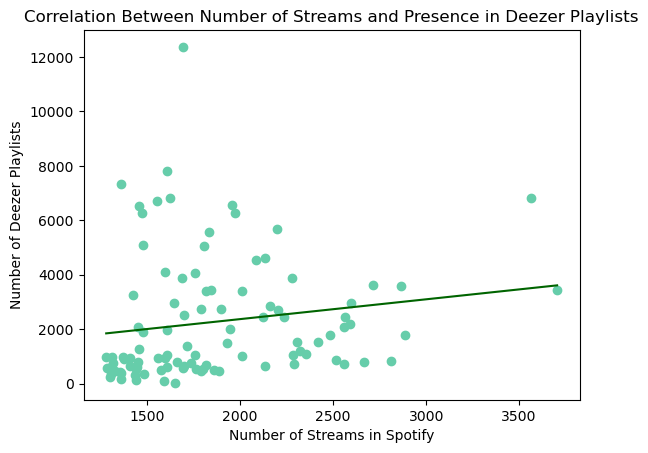

In [94]:
# Correlation between presence in spotify playlists and in deezer playlists

deezer = top100_streams_df['in_deezer_playlists']

correlation = st.pearsonr(streams,deezer)
print(correlation)

plt.scatter(streams,deezer,marker="o", facecolors="mediumaquamarine", edgecolors="mediumaquamarine")
plt.xlabel("Number of Streams in Spotify")
plt.ylabel("Number of Deezer Playlists")
plt.title("Correlation Between Number of Streams and Presence in Deezer Playlists")

e_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(streams,deezer)
pe_fit = e_slope * streams + pe_int
plt.plot(streams,pe_fit,color='darkgreen')

plt.show()

### Charts vs Playlists

In [95]:
# Define the columns of interest that include various charts and playlists appearances
columns_of_interest = [
    'track_name', 'artist(s)_name', 'streams', 
    'in_spotify_playlists', 'in_spotify_charts', 
    'in_apple_playlists', 'in_apple_charts', 
    'in_deezer_playlists', 'in_deezer_charts', 
    'in_shazam_charts'
]

# Create a new DataFrame from top100_streams_df with only the columns of interest
charts_vs_playlists = top100_streams_df[columns_of_interest]

# Display the first few rows to verify the new DataFrame
charts_vs_playlists

,track_name,artist(s)_name,streams,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
55,Blinding Lights,The Weeknd,3703895074,43899,69,672,199,3421.0,20,NaN
179,Shape of You,Ed Sheeran,3562543890,32181,10,33,0,6808.0,7,0
86,Someone You Loved,Lewis Capaldi,2887241814,17836,53,440,125,1800.0,0,NaN
620,Dance Monkey,Tones and I,2864791672,24529,0,533,167,3595.0,6,NaN
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550,24094,78,372,117,843.0,4,69
...,...,...,...,...,...,...,...,...,...,...
274,Shivers,Ed Sheeran,1302184087,10147,30,234,71,543.0,18,NaN
401,Heather,Conan Gray,1301799902,6170,7,82,1,231.0,0,2
22,I Wanna Be Yours,Arctic Monkeys,1297026226,12859,110,24,98,582.0,2,73
820,Iris,The Goo Goo Dolls,1284942608,13101,9,137,5,582.0,0,0


Correlation coefficient: -0.0016455828577665935


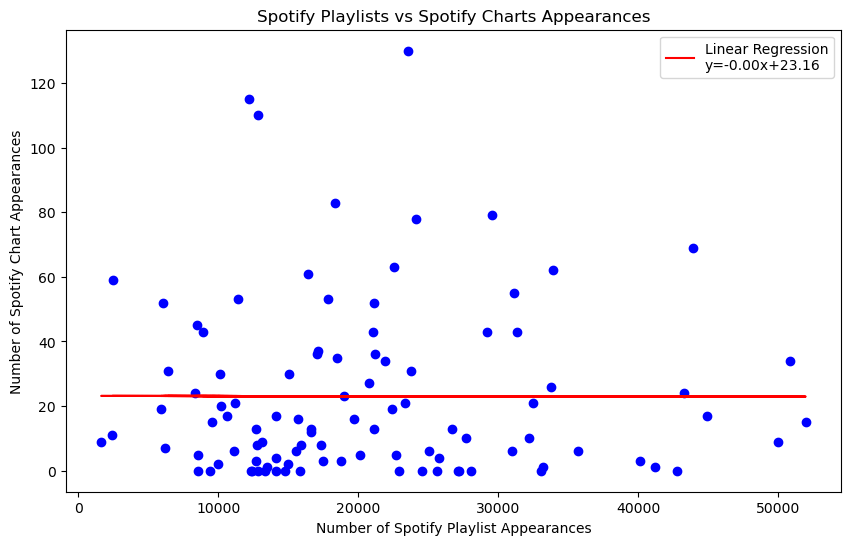

The R-squared value is: 2.707942941775323e-06


In [96]:
# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(charts_vs_playlists['in_spotify_playlists'], charts_vs_playlists['in_spotify_charts'])
print(f"Correlation coefficient: {correlation_coefficient}")

# Calculate the linear regression model parameters
slope, intercept, r_value, p_value, std_err = st.linregress(charts_vs_playlists['in_spotify_playlists'], charts_vs_playlists['in_spotify_charts'])

# Generate regression values for line of best fit
regression_values = charts_vs_playlists['in_spotify_playlists'] * slope + intercept

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(charts_vs_playlists['in_spotify_playlists'], charts_vs_playlists['in_spotify_charts'], color='blue')

# Plot the regression line
plt.plot(charts_vs_playlists['in_spotify_playlists'], regression_values, color='red', label=f'Linear Regression\ny={slope:.2f}x+{intercept:.2f}')
plt.title('Spotify Playlists vs Spotify Charts Appearances')
plt.xlabel('Number of Spotify Playlist Appearances')
plt.ylabel('Number of Spotify Chart Appearances')
plt.legend()

# Show plot
plt.show()

# Optionally print the r-squared value to see how well our model fits the data
print(f"The R-squared value is: {r_value**2}")

Correlation coefficient: 0.581564753413546


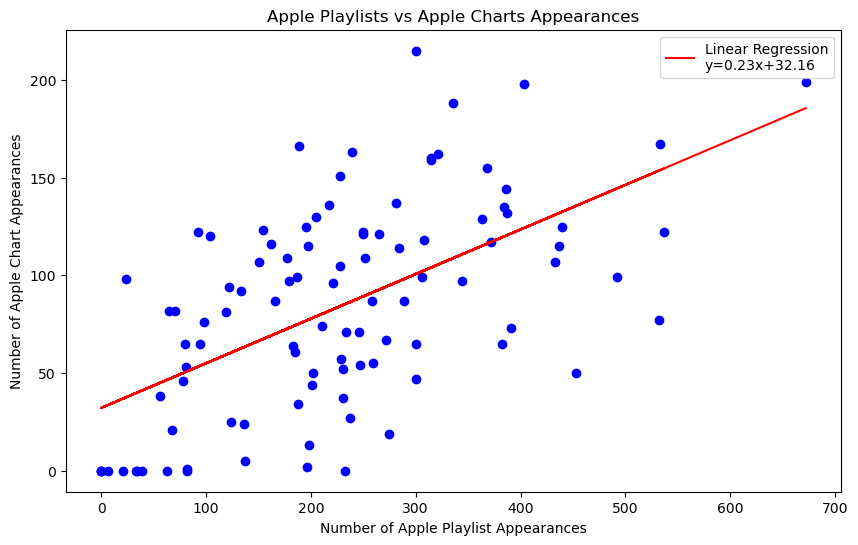

The R-squared value is: 0.3382175624129589


In [97]:
# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(charts_vs_playlists['in_apple_playlists'], charts_vs_playlists['in_apple_charts'])
print(f"Correlation coefficient: {correlation_coefficient}")

# Calculate the linear regression model parameters
slope, intercept, r_value, p_value, std_err = st.linregress(charts_vs_playlists['in_apple_playlists'], charts_vs_playlists['in_apple_charts'])

# Generate regression values for line of best fit
regression_values = charts_vs_playlists['in_apple_playlists'] * slope + intercept

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(charts_vs_playlists['in_apple_playlists'], charts_vs_playlists['in_apple_charts'], color='blue')

# Plot the regression line
plt.plot(charts_vs_playlists['in_apple_playlists'], regression_values, color='red', label=f'Linear Regression\ny={slope:.2f}x+{intercept:.2f}')
plt.title('Apple Playlists vs Apple Charts Appearances')
plt.xlabel('Number of Apple Playlist Appearances')
plt.ylabel('Number of Apple Chart Appearances')
plt.legend()

# Show plot
plt.show()

# Print the r-squared value to show how well the model fits the data
print(f"The R-squared value is: {r_value**2}")

Correlation coefficient: -0.13228927869935725


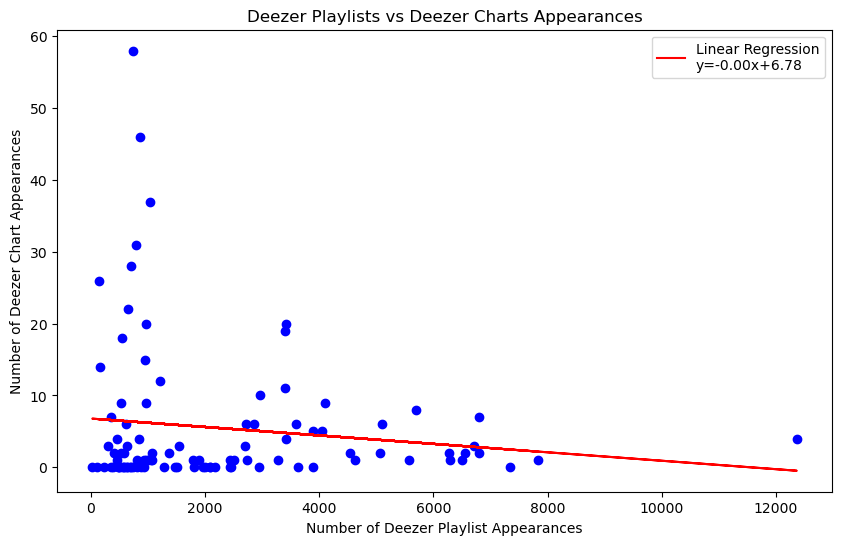

The R-squared value is: 0.017500453258796185


In [98]:
# Drop any rows with NaN or inf values
charts_vs_playlists = charts_vs_playlists.dropna(subset=['in_deezer_playlists', 'in_deezer_charts'])
charts_vs_playlists = charts_vs_playlists.replace([np.inf, -np.inf], np.nan).dropna(subset=['in_deezer_playlists', 'in_deezer_charts'])

# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(charts_vs_playlists['in_deezer_playlists'], charts_vs_playlists['in_deezer_charts'])
print(f"Correlation coefficient: {correlation_coefficient}")

# Calculate the linear regression model parameters
slope, intercept, r_value, p_value, std_err = st.linregress(charts_vs_playlists['in_deezer_playlists'], charts_vs_playlists['in_deezer_charts'])

# Generate regression values for line of best fit
regression_values = charts_vs_playlists['in_deezer_playlists'] * slope + intercept

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(charts_vs_playlists['in_deezer_playlists'], charts_vs_playlists['in_deezer_charts'], color='blue')

# Plot the regression line
plt.plot(charts_vs_playlists['in_deezer_playlists'], regression_values, color='red', label=f'Linear Regression\ny={slope:.2f}x+{intercept:.2f}')
plt.title('Deezer Playlists vs Deezer Charts Appearances')
plt.xlabel('Number of Deezer Playlist Appearances')
plt.ylabel('Number of Deezer Chart Appearances')
plt.legend()

# Show plot
plt.show()

# Print the r-squared value to show how well the model fits the data
print(f"The R-squared value is: {r_value**2}")

### Top 100 Released Date Analysis 

In [ ]:
#Filter out songs that were relized before July 2015
top_100_one_year = top100_streams_df.loc[((top100_streams_df["released_year"] >= 2015) & (top100_streams_df["released_month"] >= 7)) | (top100_streams_df["released_year"] >= 2016)]

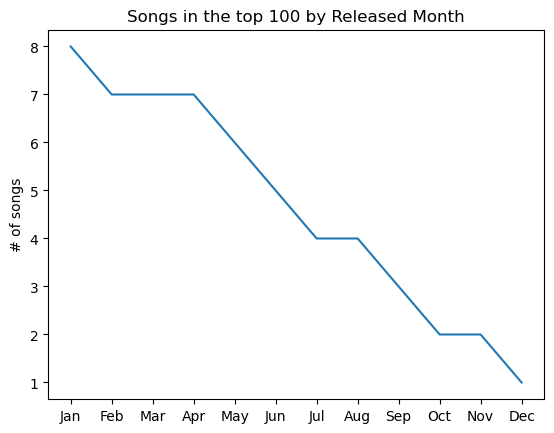

In [ ]:
#Work data to better be represented in graph
songs_month = list(top_100_one_year["released_month"].value_counts(sort=True))
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 

#Line plot|
plt.title("Songs in the top 100 by Released Month")
plt.ylabel("# of songs")
plt.plot(months,songs_month)

<BarContainer object of 12 artists>

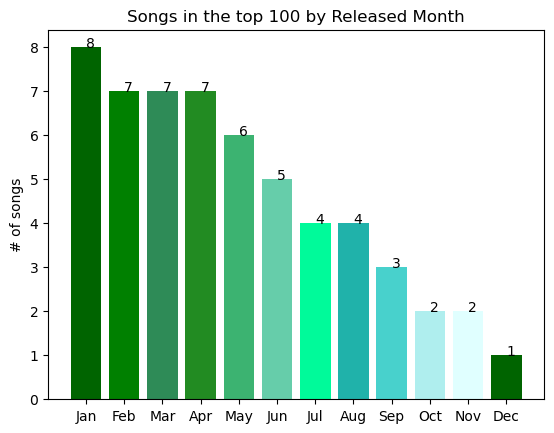

In [ ]:
#Bar plot
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

colors = ['darkgreen','green','seagreen','forestgreen','mediumseagreen','mediumaquamarine','mediumspringgreen','lightseagreen','mediumturquoise','paleturquoise','lightcyan']
plt.title("Songs in the top 100 by Released Month")
plt.ylabel("# of songs")
addlabels(months,songs_month)
plt.bar(months,songs_month, color=colors)


In [ ]:
#Group songs depending on the season when it was released
spring = top_100_one_year.loc[((top_100_one_year["released_month"] == 3) & (top_100_one_year["released_day"] >= 20)) |(top_100_one_year["released_month"] == 4) | (top_100_one_year["released_month"] == 5) | ((top_100_one_year["released_month"] == 6) & (top_100_one_year["released_day"] < 21))]
summer = top_100_one_year.loc[((top_100_one_year["released_month"] == 6) & (top_100_one_year["released_day"] >= 21)) |(top_100_one_year["released_month"] == 7) | (top_100_one_year["released_month"] == 8) | ((top_100_one_year["released_month"] == 9) & (top_100_one_year["released_day"] < 23))]
fall = top_100_one_year.loc[((top_100_one_year["released_month"] == 9) & (top_100_one_year["released_day"] >= 23)) |(top_100_one_year["released_month"] == 10) | (top_100_one_year["released_month"] == 11) | ((top_100_one_year["released_month"] == 12) & (top_100_one_year["released_day"] < 21))]
winter = top_100_one_year.loc[((top_100_one_year["released_month"] == 12) & (top_100_one_year["released_day"] >= 21)) |(top_100_one_year["released_month"] == 1) | (top_100_one_year["released_month"] == 2) | ((top_100_one_year["released_month"] == 3) & (top_100_one_year["released_day"] < 20))]

#Count songs from each season
spring_total = len(spring)
summer_total = len(summer)
fall_total = len(fall)
winter_total = len(winter)

#Create a list with the sum of songs per season
season_list = [spring_total, summer_total, fall_total, winter_total]


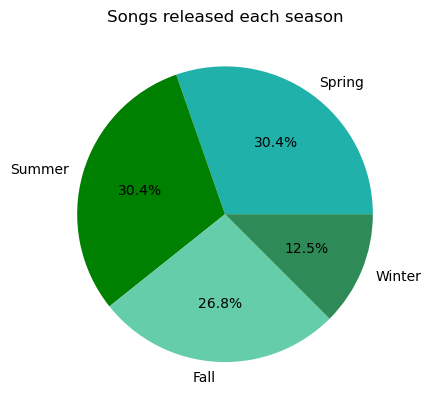

In [ ]:
#Pie chart
colors_pie =  ['lightseagreen','green','mediumaquamarine','seagreen']
labels = 'Spring', 'Summer', 'Fall', 'Winter'
plt.title("Songs released each season")
pie_chart_season = plt.pie(season_list, labels=labels,autopct='%1.1f%%',colors=colors_pie)

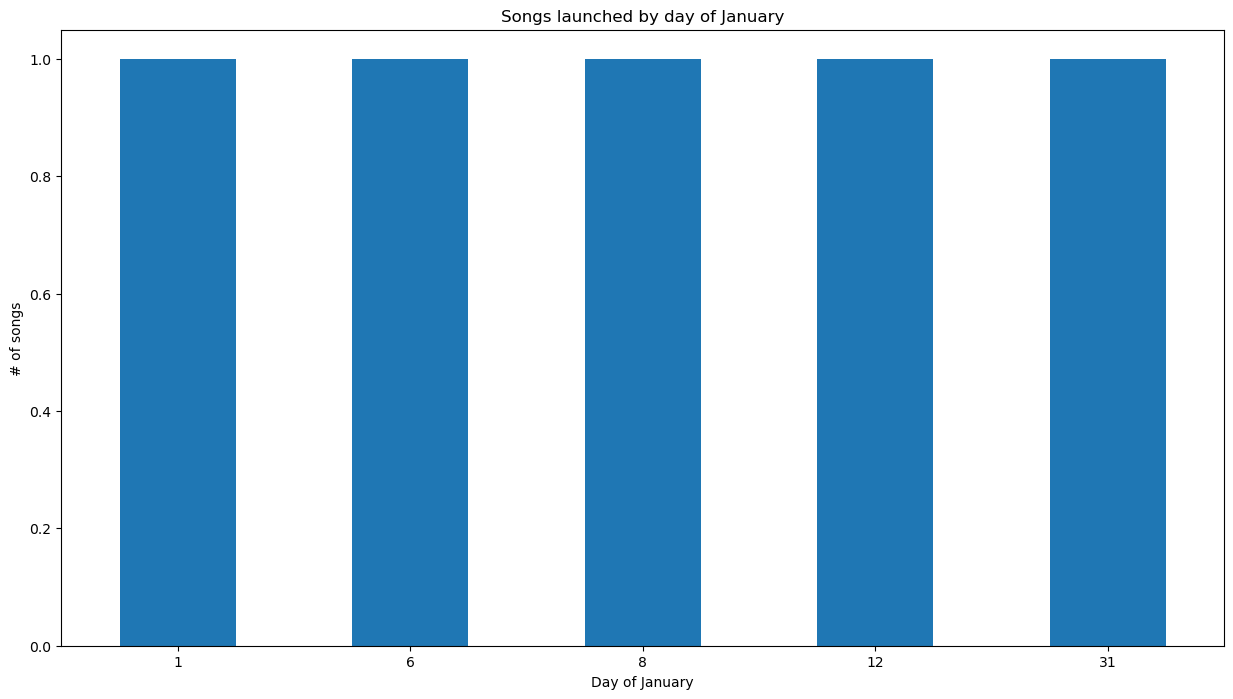

In [ ]:
#Since January is the month with the most top song, check day of the month with the greatest number of songs in the top 100
jan_rele_top100 = top_100_one_year.loc[top_100_one_year['released_month'] == 1]
songs_jan = jan_rele_top100["released_day"].value_counts().sort_index().plot(kind='bar', ylabel='# of songs', xlabel='Day of January',figsize=(15,8))
plt.title("Songs launched by day of January")
plt.xticks(rotation=0)
plt.show()